#  `EDA (Analisis exploratorio de datos)` 

In [20]:
# Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [21]:
df_movies = pd.read_csv("df_movies.csv",low_memory=False)

In [22]:
# Revisión de valores nulos
print(df_movies.isnull().sum())

Unnamed: 0                   0
budget                  519880
movie_id                519880
popularity              519880
release_date            519880
revenue                 519880
title                   519880
vote_average            519880
vote_count              519880
Genero                  520349
name                    560834
company                 524172
release_year            519880
retorno_de_inversion    525088
director                100432
actor                     2354
dtype: int64


In [23]:
# Estadísticas descriptivas
print(df_movies.describe())

          Unnamed: 0        budget       movie_id    popularity       revenue  \
count  565331.000000  4.545100e+04   45451.000000  45451.000000  4.545100e+04   
mean   282665.000000  4.220946e+06  107984.599745      2.926887  1.121930e+07   
std    163197.146853  1.741722e+07  112111.336735      6.006458  6.433984e+07   
min         0.000000  0.000000e+00       2.000000      0.000000  0.000000e+00   
25%    141332.500000  0.000000e+00   26367.500000      0.389095  0.000000e+00   
50%    282665.000000  0.000000e+00   59871.000000      1.131386  0.000000e+00   
75%    423997.500000  0.000000e+00  156327.500000      3.694370  0.000000e+00   
max    565330.000000  3.800000e+08  469172.000000    547.488298  2.787965e+09   

       vote_average    vote_count  release_year  retorno_de_inversion  
count  45451.000000  45451.000000  45451.000000          4.024300e+04  
mean       5.624085    109.989703   1991.882027          8.983976e+03  
std        1.915424    491.352336     24.057726       

## Histograma de variables numéricas

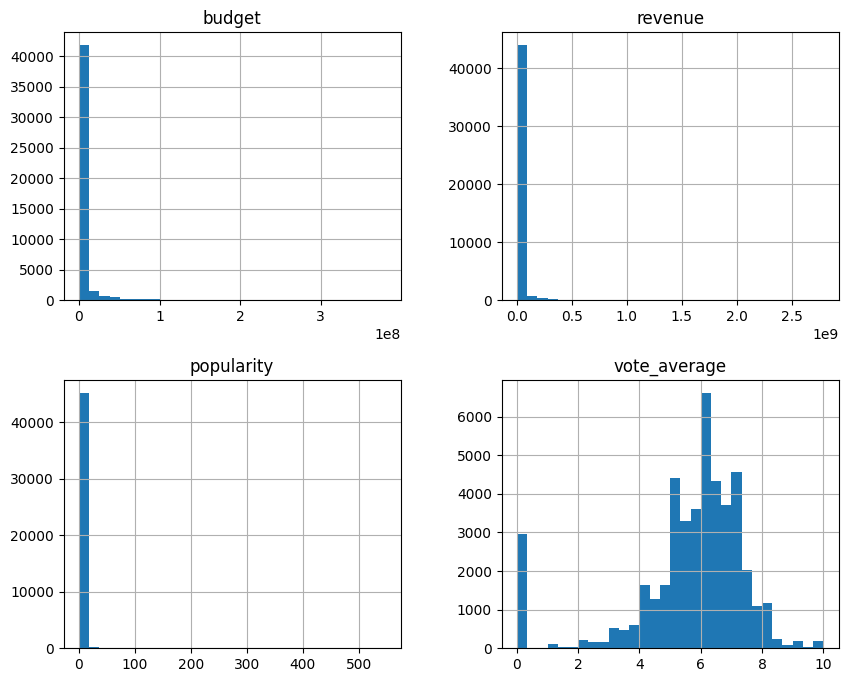

In [24]:
# Histograma de variables numéricas
df_movies[['budget', 'revenue', 'popularity', 'vote_average']].hist(bins=30, figsize=(10, 8))
plt.show()

## Outliers

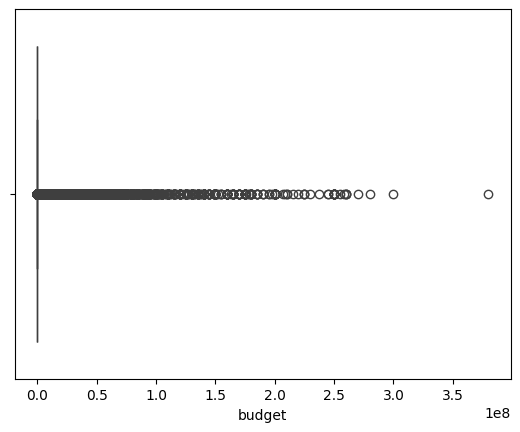

In [25]:
# Boxplot para visualizar outliers
sns.boxplot(x=df_movies['budget'])
plt.show()

##### Calculamos los posible outliers

In [26]:
# Calcular los outliers en la columna 'budget'
Q1 = df_movies["budget"].quantile(0.25)
Q3 = df_movies['budget'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Calculamos los limites
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR

In [28]:
# Observamos los outliers que superan los limites
outliers = df_movies[(df_movies['revenue'] < Limite_Inferior) | (df_movies['revenue'] > Limite_Superior)]

In [29]:
print("Los valores atipicos de precios que se presentaron con mayor frecuencia fueron 2219 registros:", outliers["revenue"].value_counts().sort_values(ascending=False))

Los valores atipicos de precios que se presentaron con mayor frecuencia fueron 2219 registros: revenue
12000000.0    20
10000000.0    19
11000000.0    19
2000000.0     18
6000000.0     17
              ..
17850711.0     1
10198357.0     1
1877122.0      1
90007945.0     1
1413000.0      1
Name: count, Length: 6862, dtype: int64


## Valores duplicados

In [30]:
duplicados = df_movies.duplicated(subset=["movie_id","title"])

In [31]:
# Ver las filas duplicadas
df_duplicados = df_movies[duplicados]

# Contar el número de filas duplicadas
num_duplicados = df_movies.duplicated().sum()
print(f'Número de duplicados: {num_duplicados}')

Número de duplicados: 0


## Correlación entre variables numéricas

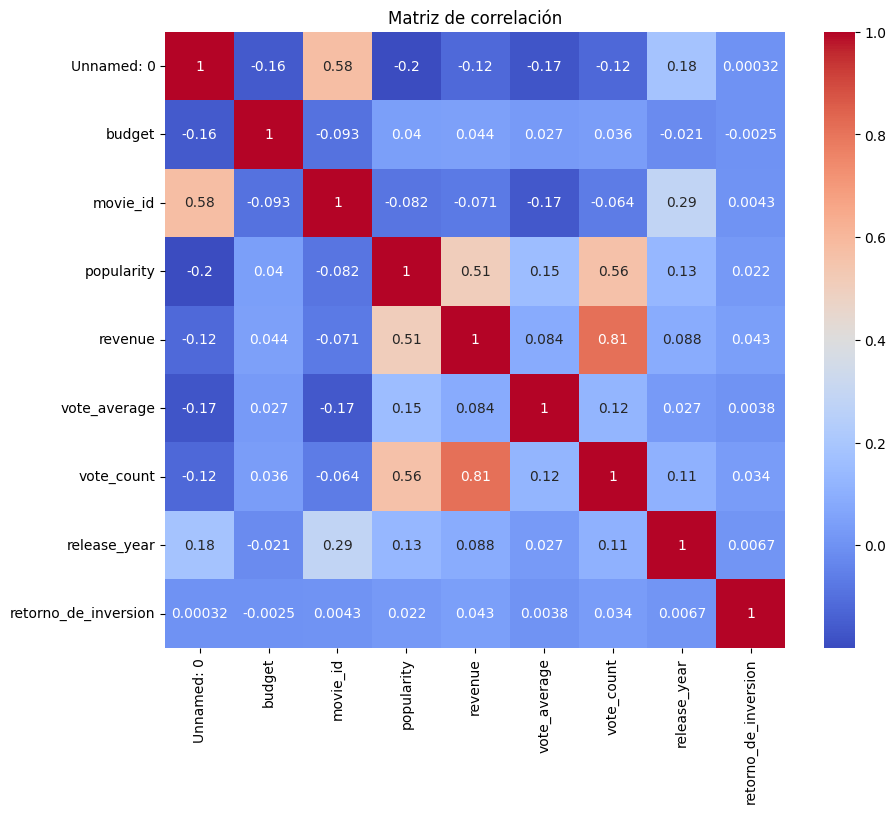

In [32]:
# Seleccionar solo las columnas numéricas
df_numeric = df_movies.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las columnas numéricas
corr = df_numeric.corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Análisis de género

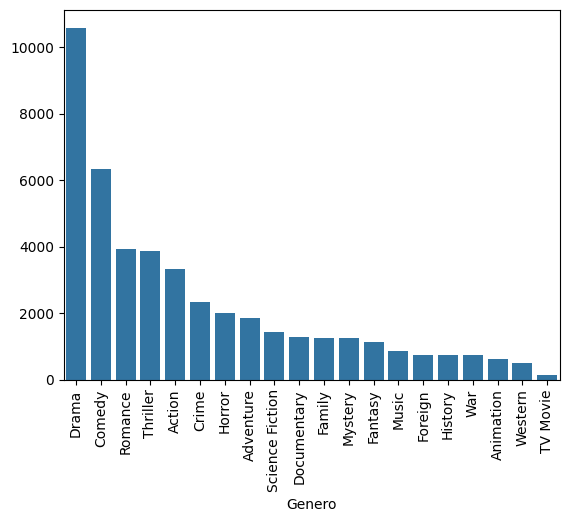

In [33]:
# Análisis de género
genero_counts = df_movies['Genero'].value_counts()
sns.barplot(x=genero_counts.index, y=genero_counts.values)
plt.xticks(rotation=90)
plt.show()

In [34]:
# Asegúrate de que release_year es de tipo numérico
df_movies['release_year'] = pd.to_numeric(df_movies['release_year'], errors='coerce')

## Analisis de tendencias

Cantidad de películas por año

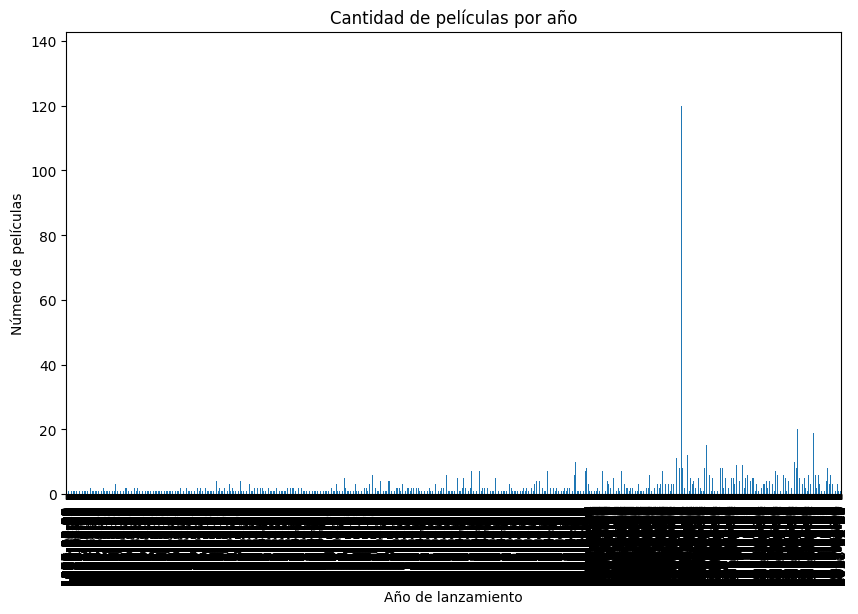

In [35]:
peliculas_por_ano = df_movies['release_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
peliculas_por_ano.plot(kind='bar')
plt.title('Cantidad de películas por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas')
plt.show()

Promedio de presupuesto, ingresos y popularidad por año

<Figure size 1000x600 with 0 Axes>

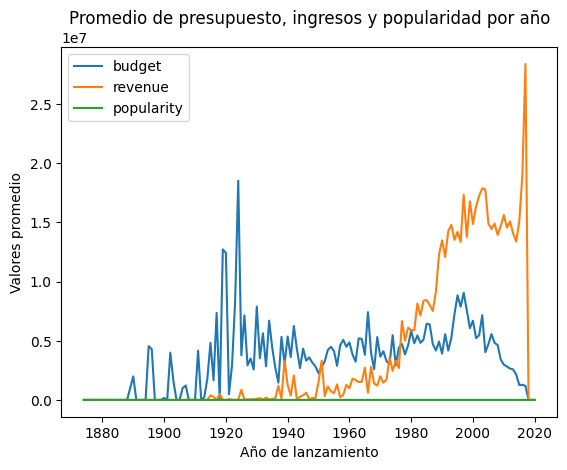

In [36]:

df_yearly = df_movies.groupby('release_year').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'popularity': 'mean'
}).dropna()

plt.figure(figsize=(10, 6))
df_yearly[['budget', 'revenue', 'popularity']].plot()
plt.title('Promedio de presupuesto, ingresos y popularidad por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Valores promedio')
plt.show()

Promedio de calificación (vote_average) por año

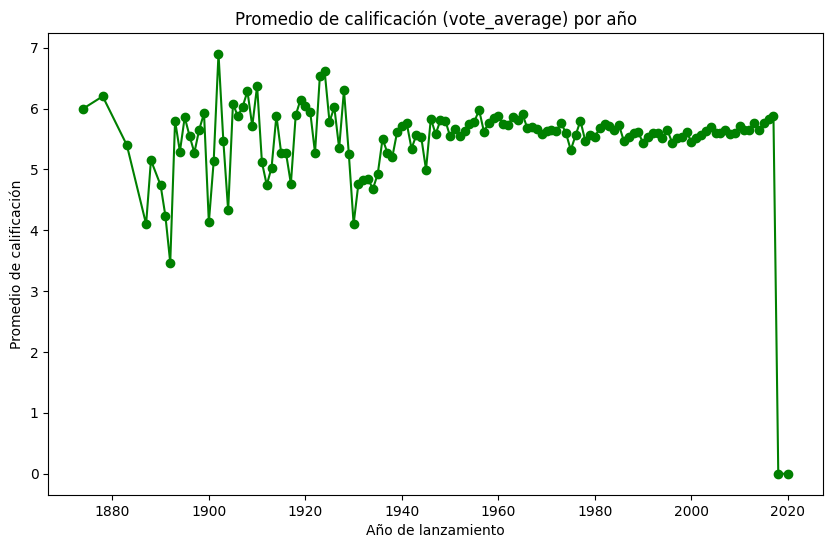

In [37]:
calificacion_por_ano = df_movies.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(10, 6))
calificacion_por_ano.plot(kind='line', marker='o', color='g')
plt.title('Promedio de calificación (vote_average) por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Promedio de calificación')
plt.show()